# Import libraries and data

In [3]:
#import libraries
import numpy as np
import pandas as pd 
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
# Importing LinearRegression
from sklearn.linear_model import LinearRegression
# Statsmodel 
import statsmodels.api as sm

In [4]:
#import dataset
df = pd.read_csv (r'C:\Users\NEHA\Desktop\MPS\ALY 6020\Midweek\MD2\CarPrice_Assignment.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [5]:
df.columns.values

array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

# Data Cleaning

In [6]:
##Checking the null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Descriptive Analytics

In [505]:
# Statistical summary of numeric variables
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.00,59.32,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.76,6.02,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.05,12.34,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.91,2.15,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.33,0.27,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.26,0.31,2.07,3.11,3.29,3.41,4.17


In [506]:
#Checking info of various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Dropping car_ID column as it will not be used in our analysis
df.drop('car_ID',axis=1,inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Exploratory Data Analysis

C:\Users\NEHA\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.


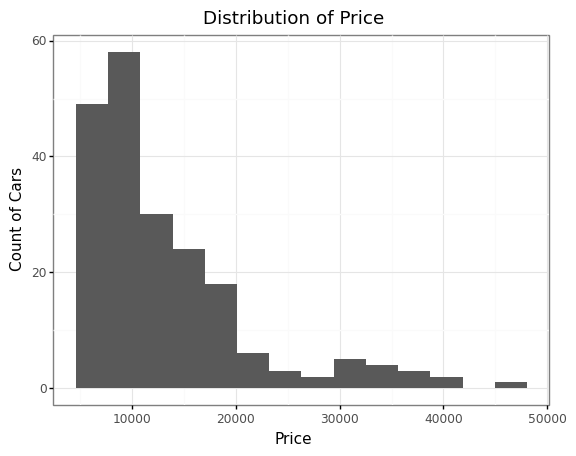

<ggplot: (179388162091)>

In [8]:
###Visualising the target variable for checking distribution
#barplot for prices
ggplot(df)  +\
  geom_histogram(aes(x = df.price,bins = 30))+\
 ggtitle("Distribution of Price") +\
 theme_bw() +\
  ylab("Count of Cars") + xlab("Price")


In [9]:
print(df[(df['price'] > 43000)])

    symboling                          CarName fueltype aspiration doornumber  \
74          1  buick regal sport coupe (turbo)      gas        std        two   

    carbody drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
74  hardtop        rwd          front      112.0      199.2  ...         304   

    fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
74        mpfi        3.8   3.35              8.0         184    4500   

    citympg  highwaympg    price  
74       14          16  45400.0  

[1 rows x 25 columns]


<AxesSubplot:>

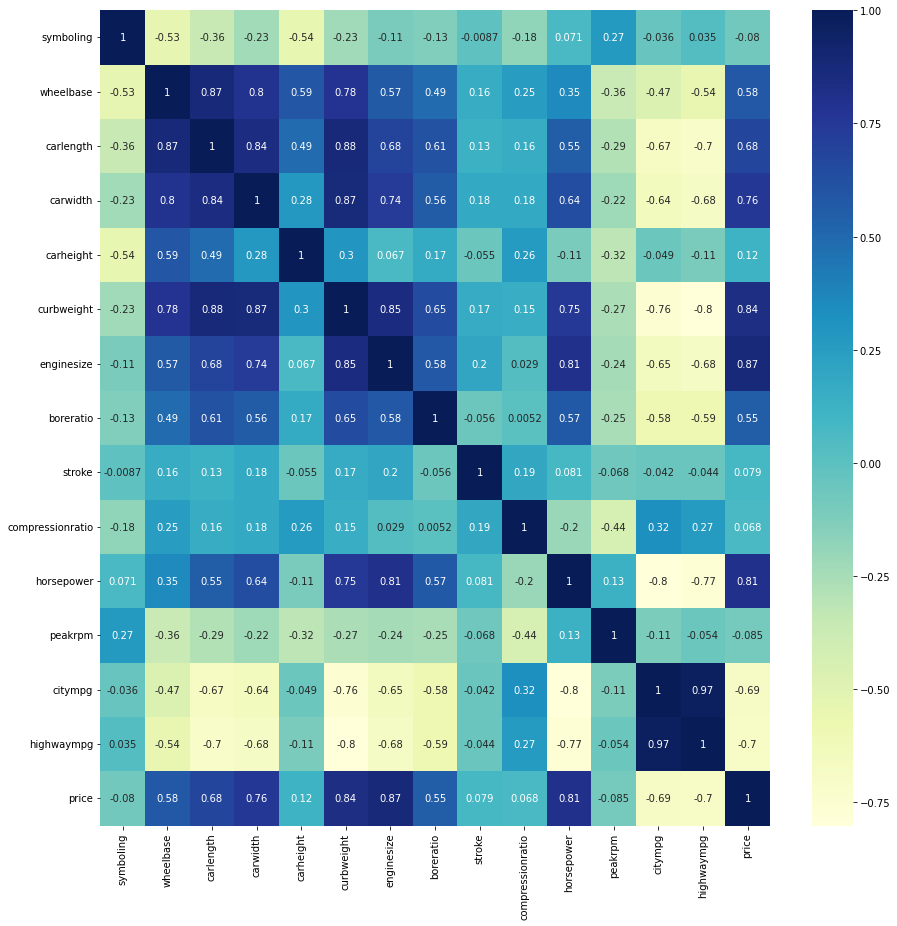

In [10]:
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

In [11]:
df.drop(['curbweight','highwaympg','horsepower','wheelbase','carwidth','carlength','boreratio'],axis=1,inplace=True)

<AxesSubplot:>

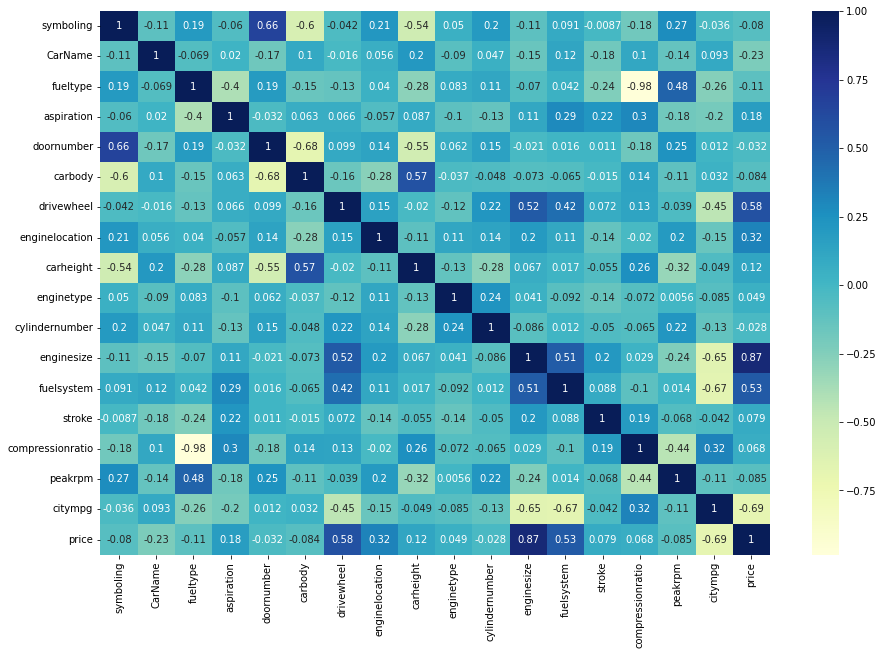

In [27]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='enginesize', ylabel='price'>

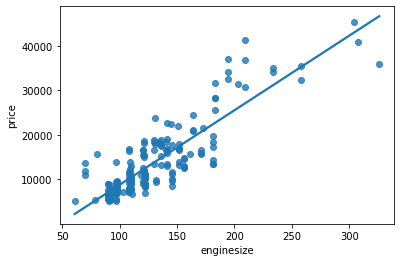

In [34]:
plt.xlabel("enginesize")
plt.ylabel("price")
sns.regplot(df.enginesize, df.price, ci=None)

C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='citympg', ylabel='price'>

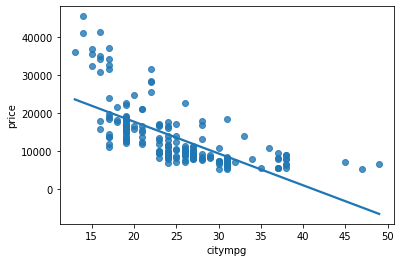

In [35]:
plt.xlabel("enginesize")
plt.ylabel("price")
sns.regplot(df.citympg, df.price, ci=None)

# Data Preprocessing

## Label Encoding

In [14]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode "object" type labels in column 
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [15]:
#view encoded data
print(df.head())

   symboling  CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3        2         1           0           1        0           2   
1          3        3         1           0           1        0           2   
2          1        1         1           0           1        2           2   
3          2        4         1           0           0        3           1   
4          2        5         1           0           0        3           0   

   enginelocation  carheight  enginetype  cylindernumber  enginesize  \
0               0       48.8           0               2         130   
1               0       48.8           0               2         130   
2               0       52.4           5               3         152   
3               0       54.3           3               2         109   
4               0       54.3           3               1         136   

   fuelsystem  stroke  compressionratio  peakrpm  citympg    price  
0           5    

## Split target and feature

In [16]:
#split column names _ feature
X = df.drop('price', axis=1)
y = df['price']

In [17]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,enginesize,fuelsystem,stroke,compressionratio,peakrpm,citympg
0,3,2,1,0,1,0,2,0,48.8,0,2,130,5,2.68,9.0,5000,21
1,3,3,1,0,1,0,2,0,48.8,0,2,130,5,2.68,9.0,5000,21
2,1,1,1,0,1,2,2,0,52.4,5,3,152,5,3.47,9.0,5000,19
3,2,4,1,0,0,3,1,0,54.3,3,2,109,5,3.40,10.0,5500,24
4,2,5,1,0,0,3,0,0,54.3,3,1,136,5,3.40,8.0,5500,18


In [18]:
# view target variables
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## Creating train and test

In [19]:
###Splitting the data into train-test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (143, 17)
X_test shape: (62, 17)
y_train shape: (143,)
y_test shape: (62,)


# Feature scaling

In [20]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

X_train_norm

array([[0.6       , 0.62328767, 1.        , ..., 0.15      , 0.55102041,
        0.5       ],
       [1.        , 0.67123288, 1.        , ..., 0.15625   , 0.55102041,
        0.16666667],
       [0.6       , 0.81506849, 1.        , ..., 0.15      , 1.        ,
        0.36111111],
       ...,
       [0.2       , 0.13013699, 0.        , ..., 0.90625   , 0.08163265,
        0.25      ],
       [0.6       , 0.23287671, 1.        , ..., 0.15      , 0.55102041,
        0.5       ],
       [0.6       , 0.04109589, 1.        , ..., 0.08125   , 0.55102041,
        0.11111111]])

# Regression Model


## M1 with all features

In [21]:
lm = LinearRegression()
lm.fit(X_train_norm, y_train)

LinearRegression()

In [22]:
y_pred = lm.predict(X_test_norm)

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),2)

Mean Absolute Error: 1831.74
Mean Squared Error: 6661549.82
Root Mean Squared Error: 2581 2


In [24]:
# Adding constant because statsmodel library doesn't include the intercept by default. 
X_train_sm = sm.add_constant(X_train_norm)
# Creating model
model_sm1 = sm.OLS(y_train, X_train_sm)
lm= model_sm1.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     46.54
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           9.96e-46
Time:                        13:53:52   Log-Likelihood:                -1341.7
No. Observations:                 143   AIC:                             2719.
Df Residuals:                     125   BIC:                             2773.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3581.3017   1.03e+04     -0.347      0.7

# M2 with 3 Features 

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=5)

# learn relationship from training data
fs.fit(X_train_norm, y_train)


SelectKBest(k=5, score_func=<function f_regression at 0x0000029C44DB6A60>)

In [37]:
# what are scores for the features
dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variables','Score']  #naming the dataframe columns
print(featureScores.sort_values(by="Score",ascending=False)) # print features in descending order of score

           Variables       Score
11        enginesize  430.488900
16           citympg  117.557542
6         drivewheel   75.662730
12        fuelsystem   61.054912
7     enginelocation    7.604749
1            CarName    6.444576
3         aspiration    6.282937
2           fueltype    5.347262
14  compressionratio    3.744818
13            stroke    3.371650
0          symboling    2.418536
15           peakrpm    2.327430
8          carheight    1.329005
4         doornumber    0.817761
9         enginetype    0.447601
10    cylindernumber    0.296180
5            carbody    0.023919


In [39]:
X = df[['enginesize', 'fuelsystem','drivewheel']]
y = df['price']
X

,enginesize,fuelsystem,drivewheel
0,130,5,2
1,130,5,2
2,152,5,2
3,109,5,1
4,136,5,0
...,...,...,...
200,141,5,2
201,141,5,2
202,173,5,2
203,145,3,2


In [40]:
###Splitting the data into train-test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
X_train

X_train shape: (143, 3)
X_test shape: (62, 3)
y_train shape: (143,)
y_test shape: (62,)


,enginesize,fuelsystem,drivewheel
122,98,1,1
125,151,5,2
166,98,5,2
1,130,5,2
199,130,5,2
...,...,...,...
87,110,6,1
103,181,5,1
67,183,3,2
24,90,1,1


In [41]:

lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lm2.predict(X_test)


In [43]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),2)

Mean Absolute Error: 2778.94
Mean Squared Error: 14785716.2
Root Mean Squared Error: 3845 2


In [45]:
# Adding constant because statsmodel library doesn't include the intercept by default. 
X_train_sm_1 = sm.add_constant(X_train)
# Creating model
model_sm = sm.OLS(y_train, X_train_sm_1)
lm2= model_sm.fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     168.6
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           4.11e-46
Time:                        14:45:34   Log-Likelihood:                -1374.4
No. Observations:                 143   AIC:                             2757.
Df Residuals:                     139   BIC:                             2769.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8452.4231   1018.357     -8.300      0.0

In [51]:
X = df[['enginesize','drivewheel', 'citympg']]
y = df['price']
X

,enginesize,drivewheel,citympg
0,130,2,21
1,130,2,21
2,152,2,19
3,109,1,24
4,136,0,18
...,...,...,...
200,141,2,23
201,141,2,19
202,173,2,18
203,145,2,26


In [52]:
###Splitting the data into train-test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
X_train

X_train shape: (143, 3)
X_test shape: (62, 3)
y_train shape: (143,)
y_test shape: (62,)


,enginesize,drivewheel,citympg
122,98,1,31
125,151,2,19
166,98,2,26
1,130,2,21
199,130,2,17
...,...,...,...
87,110,1,23
103,181,1,19
67,183,2,22
24,90,1,31


In [53]:
# Adding constant because statsmodel library doesn't include the intercept by default. 
X_train_sm_1 = sm.add_constant(X_train)
# Creating model
model_sm = sm.OLS(y_train, X_train_sm_1)
lm3= model_sm.fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     184.7
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.67e-48
Time:                        15:10:27   Log-Likelihood:                -1369.2
No. Observations:                 143   AIC:                             2746.
Df Residuals:                     139   BIC:                             2758.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3681   2431.151     -0.004      0.9

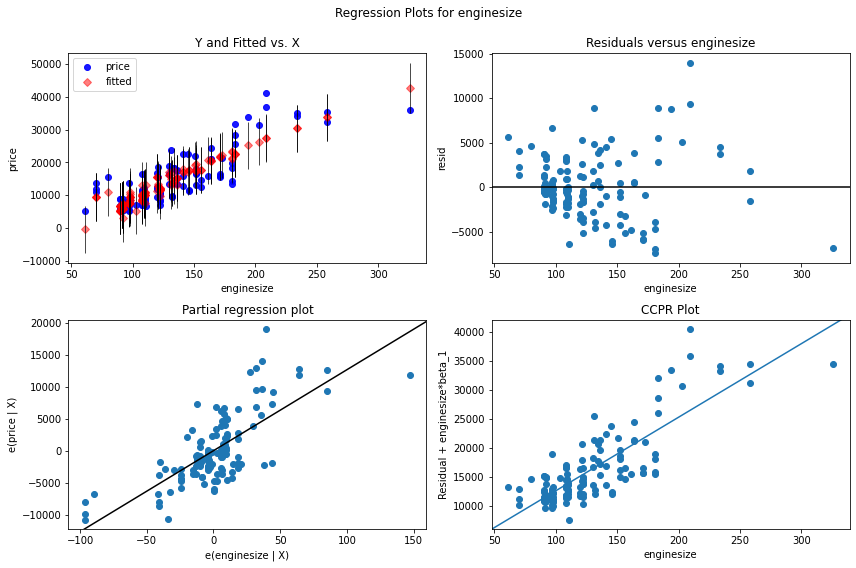

In [459]:
#create residual vs. predictor plot for 'enginesize'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm2, 'enginesize', fig=fig)

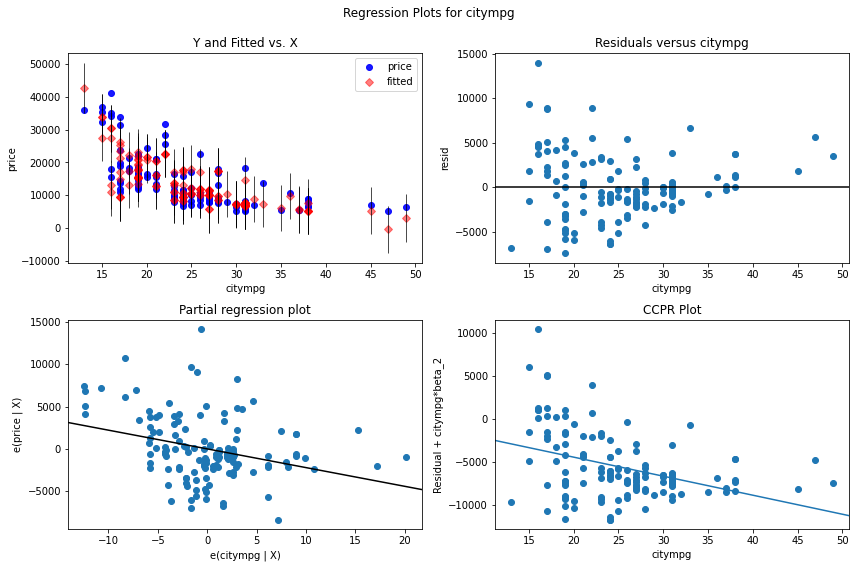

In [460]:
#create residual vs. predictor plot for 'citympg'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm2, 'citympg', fig=fig)

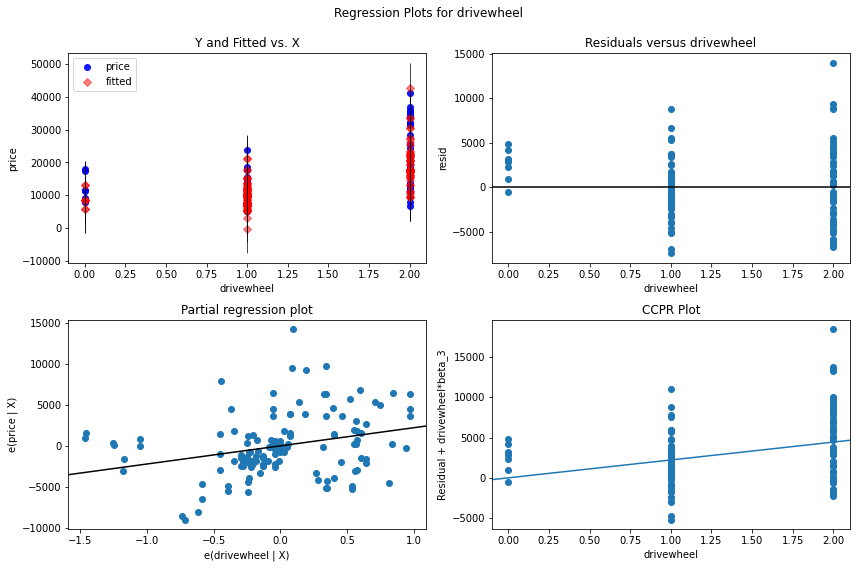

In [482]:
#create residual vs. predictor plot for 'drivewheel'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm2, 'drivewheel', fig=fig)

In [484]:
X = df[['enginesize', 'fuelsystem','drivewheel']]
y = df['price']
X

,enginesize,fuelsystem,drivewheel
0,130,5,2
1,130,5,2
2,152,5,2
3,109,5,1
4,136,5,0
...,...,...,...
200,141,5,2
201,141,5,2
202,173,5,2
203,145,3,2


In [486]:
###Splitting the data into train-test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
X_train

X_train shape: (143, 3)
X_test shape: (62, 3)
y_train shape: (143,)
y_test shape: (62,)


,enginesize,fuelsystem,drivewheel
122,98,1,1
125,151,5,2
166,98,5,2
1,130,5,2
199,130,5,2
...,...,...,...
87,110,6,1
103,181,5,1
67,183,3,2
24,90,1,1


In [487]:
# Adding constant because statsmodel library doesn't include the intercept by default. 
X_train_sm_1 = sm.add_constant(X_train)
# Creating model
model_sm = sm.OLS(y_train, X_train_sm_1)
lm2= model_sm.fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     168.6
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           4.11e-46
Time:                        23:38:25   Log-Likelihood:                -1374.4
No. Observations:                 143   AIC:                             2757.
Df Residuals:                     139   BIC:                             2769.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8452.4231   1018.357     -8.300      0.0